# Merge Sort 學習歷程、流程圖

哲學四 05113010 陳鳳庭

## Content
 - [Merge Sort 學習歷程](http://localhost:8888/notebooks/Data%20%20structures%20and%20Algorithms/The%20process%20of%20learning%20merge%20sort.ipynb#Merge-Sort-%E5%AD%B8%E7%BF%92%E6%AD%B7%E7%A8%8B)
    - [建立分割函數：ˍdivide](http://localhost:8888/notebooks/Data%20%20structures%20and%20Algorithms/The%20process%20of%20learning%20merge%20sort.ipynb#%E5%BB%BA%E7%AB%8B%E5%88%86%E5%89%B2%E5%87%BD%E6%95%B8%EF%BC%9A%CB%8Ddivide)
    - [建立合併函數：_merge](http://localhost:8888/notebooks/Data%20%20structures%20and%20Algorithms/The%20process%20of%20learning%20merge%20sort.ipynb#%E5%BB%BA%E7%AB%8B%E5%90%88%E4%BD%B5%E5%87%BD%E6%95%B8%EF%BC%9A_merge)
    - [整合merge_sort](http://localhost:8888/notebooks/Data%20%20structures%20and%20Algorithms/The%20process%20of%20learning%20merge%20sort.ipynb#%E6%95%B4%E5%90%88merge_sort)
 - [Merge Sort 流程圖](http://localhost:8888/notebooks/Data%20%20structures%20and%20Algorithms/The%20process%20of%20learning%20merge%20sort.ipynb#Merge-Sort-%E6%B5%81%E7%A8%8B%E5%9C%96)
     - Demo
 - [參考資料](http://localhost:8888/notebooks/Data%20%20structures%20and%20Algorithms/The%20process%20of%20learning%20merge%20sort.ipynb#%E5%8F%83%E8%80%83%E8%B3%87%E6%96%99)
 
 
         P.S.此處連結會另外開啟分頁

---

## Merge Sort 學習歷程

開始打Merge Sort已經離上課有段時間了，在複習完課堂影片，跟老師給的補充資料以後，嘗試以自己的理解來創建原始碼

### Merge Sort ：
    1. 不斷的將list分兩堆，直到不能再分為止(一個值)
    2. 再將分出的堆符合大小順序合併

從上述流程發現Merge Sort大致可以分為分割與合併兩個部分，所以我先著手建立分割的函式

#### 建立分割函數：ˍdivide

將list分成兩推，對半切需要考慮list長度為基數還是偶數，但因為分兩半而已，所以只要統一邊，另一邊拿總長度減掉就好
- 左邊：長度的一半取整數
- 右邊：原本長度-左邊

In [11]:
#分2堆：基數、偶數

def _divide(list, n):
    left = []
    right = []
    
    n1 = int(n/2)
    n2 = n - n1
    
    for i in range(n1):
        left.append(list[i])
    
    for j in range(n1, n):
        right.append(list[j])

確認語法

In [12]:
n = 7
int(n/2)

3

確定左邊堆、右邊堆長度之後，將list的值一個個放入

In [2]:
for i in range(3):
    print(i)

0
1
2


In [8]:
for i in range(3, 7):
    print(i)

3
4
5
6


檢查目前函式可行性

In [15]:
list = [2, 7, 8, 9, 1, 2, 4]
n = len(list)
n1 = int(n/2)
n2 = n-n1
s = []
for i in range(n1):
        s.append(list[i])
s

[2, 7, 8]

In [9]:
b = []
for j in range(n1, n):
    b.append(list[j])
    
b

[9, 1, 2, 4]

In [36]:
1/2
int(1/2)

0

嘗試加入遞迴

In [16]:
#分2堆：遞迴進行

def _divide (list, n):
    if n <= 0:
        return list
       
    left = []
    right = []
    
    n1 = int(n/2)
    n2 = n - n1
    
    for i in range(n1):
        left.append(list[i])
    
    for j in range(n1, n):
        right.append(list[j])
        
    _divide(left, n1)
    _divide(right, n2)

In [17]:
_divide(list, 7)

RecursionError: maximum recursion depth exceeded in comparison

發生Error，上網搜尋一下：出現無限遞迴的情形

發現遞迴出口設錯，如果出口設n <= 0，n1變0沒有問題，但是n2會無限循環下次，因為它是拿總長度-n1，來調整一下

In [18]:
# 分2堆：遞迴進行

def _divide (list, n):
    if n <= 1:
        return list
    
    left = []
    right = []
    
    n1 = int(n/2)
    n2 = n - n1
    
    for i in range(n1):
        left.append(list[i])
    
    for j in range(n1, n):
        right.append(list[j])
        
    _divide(left, n1)
    _divide(right, n2)
    

In [19]:
_divide(list, 7)

In [263]:
print(_divide(list, 7))

None


Error問題解決，但是回傳值不知道要設什麼

In [21]:
#分2堆：遞迴進行

def _divide(list, n):
    if n <= 1:
        return list
    
    left = []
    right = []
    
    n1 = int(n/2)
    n2 = n - n1
    
    for i in range(n1):
        left.append(list[i])
    
    for j in range(n1, n):
        right.append(list[j])
    
            
    _divide(left, n1)
    _divide(right, n2)
    
    return left, right
    

In [22]:
list = [2, 7, 8, 9, 1, 2, 4]
p = _divide(list, len(list))
p

([2, 7, 8], [9, 1, 2, 4])

回傳結果不如預期，再調整

In [271]:
#分2堆：遞迴進行

def _divide(list, n):
    if n <= 1:
        return list
    
    left = []
    right = []
    
    n1 = int(n/2)
    n2 = n - n1
    
    for i in range(n1):
        left.append(list[i])
    
    for j in range(n1, n):
        right.append(list[j])
    
    print(left, right)
        
    _divide(left, n1)
    _divide(right, n2)
    
    return left, right
    

In [273]:
list = [2, 7, 8, 9, 1, 2, 4]
p = _divide(list, len(list))
p

[2, 7, 8] [9, 1, 2, 4]
[2] [7, 8]
[7] [8]
[9, 1] [2, 4]
[9] [1]
[2] [4]


([2, 7, 8], [9, 1, 2, 4])

遞迴運作看起來沒有問題，但是沒有把遞迴結果存下來，所以結果不如預期，再調整一下

In [276]:
#分2堆：遞迴進行

def _divide(list, n):
    if n <= 1:
        return list
    
    left = []
    right = []
    
    n1 = int(n/2)
    n2 = n - n1
    
    for i in range(n1):
        left.append(list[i])
    
    for j in range(n1, n):
        right.append(list[j])
    
    print(left, right)
            
    left = _divide(left, n1)
    right = _divide(right, n2)
    
    return left, right
    

In [277]:
list = [2, 7, 8, 9, 1, 2, 4]
p = _divide(list, len(list))
p

[2, 7, 8] [9, 1, 2, 4]
[2] [7, 8]
[7] [8]
[9, 1] [2, 4]
[9] [1]
[2] [4]


(([2], ([7], [8])), (([9], [1]), ([2], [4])))

In [278]:
p[0]

([2], ([7], [8]))

結果符合預期，但因為回傳方式是在return放兩個值，所以回傳值是一個tuple，還要再調整

In [57]:
#分2堆：基數、偶數

def _divide(list, n):
    if n <= 1:
        return list
    
    left = []
    right = []
    
    n1 = int(n/2)
    n2 = n - n1
    
    for i in range(n1):
        left.append(list[i])
    
    for j in range(n1, n):
        right.append(list[j])
    
    print(left, right , '1')
        
    left_divide = _divide(left, n1)
    right_divide = _divide(right, n2)
    
    print(left, right, '2')
    
#     return left, right
    return left_divide, right_divide

In [58]:
list = [2, 7, 8, 9, 1, 2, 4]
p = _divide(list, len(list))
p

[2, 7, 8] [9, 1, 2, 4] 1
[2] [7, 8] 1
[7] [8] 1
[7] [8] 2
[2] [7, 8] 2
[9, 1] [2, 4] 1
[9] [1] 1
[9] [1] 2
[2] [4] 1
[2] [4] 2
[9, 1] [2, 4] 2
[2, 7, 8] [9, 1, 2, 4] 2


(([2], ([7], [8])), (([9], [1]), ([2], [4])))

👆🏻如果將分堆結果另存，記得回傳值要設為另存的變數

In [49]:
#分2堆：基數、偶數

def _divide(list, n):
    if n <= 1:
        return list
    
    left = []
    right = []
    
    n1 = int(n/2)
    n2 = n - n1
    
    for i in range(n1):
        left.append(list[i])
    
    for j in range(n1, n):
        right.append(list[j])
    
    print(left, right , '1')
        
    left = _divide(left, n1)
    right = _divide(right, n2)
    
    print(left, right, '2') 
    
    return left, right

In [50]:
list = [2, 7, 8, 9, 1, 2, 4]
p = _divide(list, len(list))
p

[2, 7, 8] [9, 1, 2, 4] 1
[2] [7, 8] 1
[7] [8] 1
[7] [8] 2
[2] ([7], [8]) 2
[9, 1] [2, 4] 1
[9] [1] 1
[9] [1] 2
[2] [4] 1
[2] [4] 2
([9], [1]) ([2], [4]) 2
([2], ([7], [8])) (([9], [1]), ([2], [4])) 2


(([2], ([7], [8])), (([9], [1]), ([2], [4])))

做了多次調整，未能解決

目前問題：
 - 遞迴回傳值如何設定?
 - 如此將此遞迴放入merge sort中

發現觀念還不清楚，再釐清一下merge sort概念

### Merge Sort ：
    1. 不斷的將list分成兩部分，分到僅剩一個元素為止
    2. 將已排序的lsit倆倆合併回來（僅剩一個元素時，因為只有一個元素，所以是排序好的）

合併是在分到僅剩一個元素後，再一個個合併回來，所以是在遞迴分堆之後，不確定如何將分堆與合併整合，先來打合併函數

#### 建立合併函數：_merge

先建立老師課堂上帶我們進行的比較合併

In [27]:
def _merge(left, right):
    
    temp = []
    
    n1 = len(left)
    n2 = len(right)
    n = n1 + n2
    
    i = 0
    j = 0
    while i <= n1-1 and j <= n2-1:
        if left[i] < right[j]:
            temp.append(left[i])
            i += 1
        else:
            temp.append(right[j])
            j += 1
   
    return temp

看目前函數可行性

In [28]:
left = [2,7]
right = [8,9]

In [29]:
_merge(left, right)

[2, 7]

加入無法比較，將剩餘的部分填入

In [36]:
def _merge(left, right):
    
    temp = []
    
    n1 = len(left)
    n2 = len(right)
    n = n1 + n2
    
    i = 0
    j = 0
    while i <= n1-1 and j <= n2-1:
        if left[i] < right[j]:
            temp.append(left[i])
            i += 1
        else:
            temp.append(right[j])
            j += 1
    
    if i == n1-1:
        while j <= n2-1:
            temp.append(right[j])
            j += 1
    else:
        while i <= n-1:
            temp.append(left[i])
            i += 1
    
    return temp
    
    

In [37]:
_merge(left, right)

IndexError: list index out of range

調整一下

In [38]:
def _merge(left, right):
    
    temp = []
    
    n1 = len(left)
    n2 = len(right)
    n = n1 + n2
    
    i = 0
    j = 0
    while i < n1 and j < n2:
        if left[i] < right[j]:
            temp.append(left[i])
            i += 1
        else:
            temp.append(right[j])
            j += 1
    print(i, j)
    return temp
    
    

In [39]:
_merge(left, right)

2 0


[2, 7]

In [40]:
def _merge(left, right):
    
    temp = []
    
    n1 = len(left)
    n2 = len(right)
    n = n1 + n2    #沒用到
    
    i = 0
    j = 0
    while i < n1 and j < n2:
        if left[i] < right[j]:
            temp.append(left[i])
            i += 1
        else:
            temp.append(right[j])
            j += 1
    
    if i == n1:
        while j < n2:
            temp.append(right[j])
            j += 1
    else:
        while i < n1:
            temp.append(left[i])
            i += 1
    
    return temp
    
    

In [41]:
_merge(left, right)

[2, 7, 8, 9]

In [42]:
left = [2,7,8]
right = [9,1,2,4]
_merge(left, right)

[2, 7, 8, 9, 1, 2, 4]

成功，完成合併函數

但是還不知道如何整合兩個部分，參考[參考資料](http://notepad.yehyeh.net/Content/Algorithm/Sort/Merge/Merge.php)

#### 整合merge_sort

嘗試將兩者合併

In [53]:
#分2堆：基數、偶數

def _divide(list, n):
    if n <= 1:
        return list
    
    left = []
    right = []
    
    n1 = int(n/2)
    n2 = n - n1
    
    for i in range(n1):
        left.append(list[i])
    
    for j in range(n1, n):
        right.append(list[j])
    
#     print(left, right , '1')
        
    left_divide = _divide(left, n1)
    right_divide = _divide(right, n2)
    
    return _merge(left_divide, right_divide)
    
#     print(left, right, '2')
    

In [54]:
list = [2, 7, 8, 9, 1, 2, 4]
_divide(list, len(list))

[1, 2, 2, 4, 7, 8, 9]

兩種皆成功執行merge sort，但是上面需要較多存儲空間，所以選下面那個

In [63]:
#分2堆：基數、偶數

def _divide(list, n):
    if n <= 1:
        return list
    
    left = []
    right = []
    
    n1 = int(n/2)
    n2 = n - n1
    
    for i in range(n1):
        left.append(list[i])
    
    for j in range(n1, n):
        right.append(list[j])
           
    left = _divide(left, n1)
    right = _divide(right, n2)
    
    return _merge(left, right)
    

In [64]:
list = [2, 7, 8, 9, 1, 2, 4]
_divide(list, len(list))

[1, 2, 2, 4, 7, 8, 9]

In [65]:
def merge_sort(list):
    n = len(list)
    return _divide(list, n)

In [62]:
a = [3,4,3,26,1,4,7,3,4,5,2,7,2,1,0,45,34,8]
merge_sort(a)

[0, 1, 1, 2, 2, 3, 3, 3, 4, 4, 4, 5, 7, 7, 8, 26, 34, 45]

成功🎉

---

## Merge Sort 流程圖

- Demo

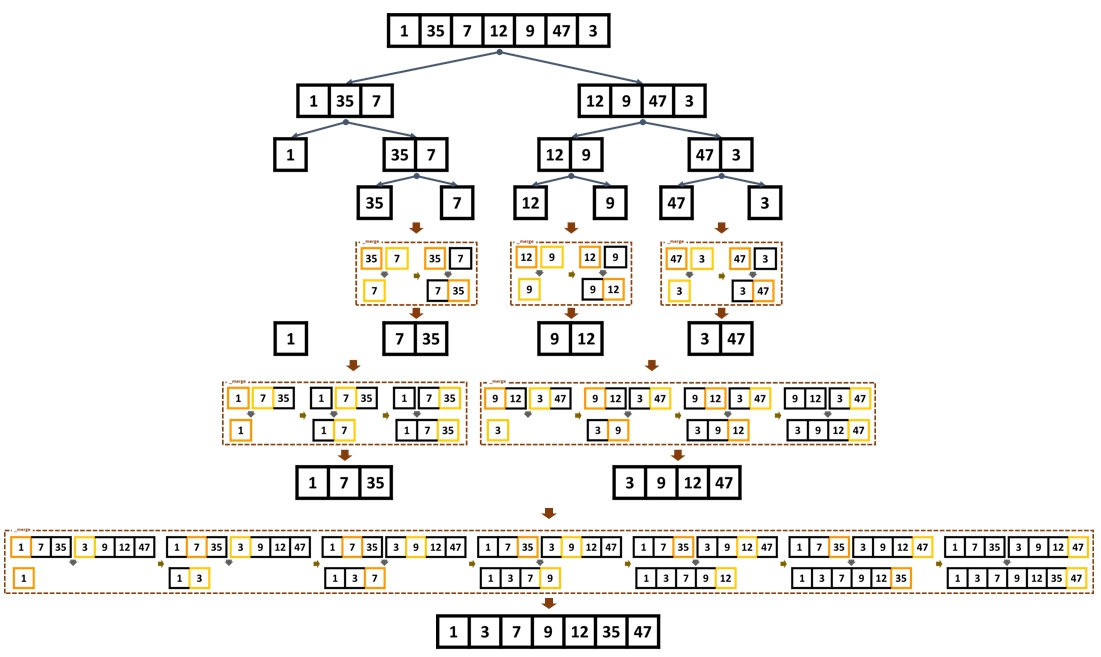

In [3]:
from IPython.display import Image
Image(filename="1573137796982.jpg", width=900, height=800)

---

## 參考資料

- [Merge sort](https://www.c-programming-simple-steps.com/merge-sort.html)
- [Merge Sort 3 – Towards an Implementation (Merge Two Lists)](https://www.youtube.com/watch?v=s8kQm8yhZ8U)
- [Merge Sort vs Quick Sort](https://www.youtube.com/watch?v=es2T6KY45cA)
- [Merge sort and quick sort](https://www.slideshare.net/MJabin/merge-sort-and-quick-sort)
- [演算法 合併排序法(Merge Sort)](http://notepad.yehyeh.net/Content/Algorithm/Sort/Merge/Merge.php)
- [初學者學演算法｜排序法進階：合併排序法](https://medium.com/appworks-school/%E5%88%9D%E5%AD%B8%E8%80%85%E5%AD%B8%E6%BC%94%E7%AE%97%E6%B3%95-%E6%8E%92%E5%BA%8F%E6%B3%95%E9%80%B2%E9%9A%8E-%E5%90%88%E4%BD%B5%E6%8E%92%E5%BA%8F%E6%B3%95-6252651c6f7e)
- [Merge Sort | GeeksforGeeks](https://www.youtube.com/watch?v=JSceec-wEyw)
- [【TBS Learning】演算法-六種排序法之四:合併排序法(merge sort)](https://www.youtube.com/watch?v=KZQbBik3Mew)